<a href="https://colab.research.google.com/github/Karagiannis-Giorg/Fuzzy-logic_and_Traffic-Control/blob/main/Traffic_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.2 MB/s eta 0:00:00


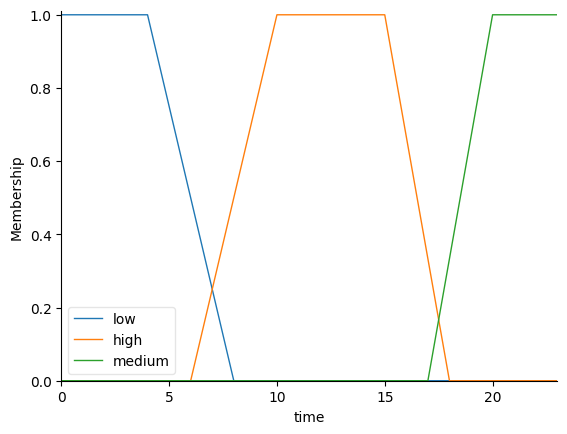

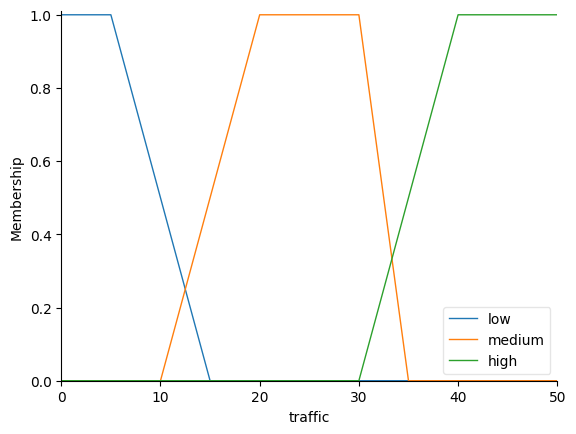

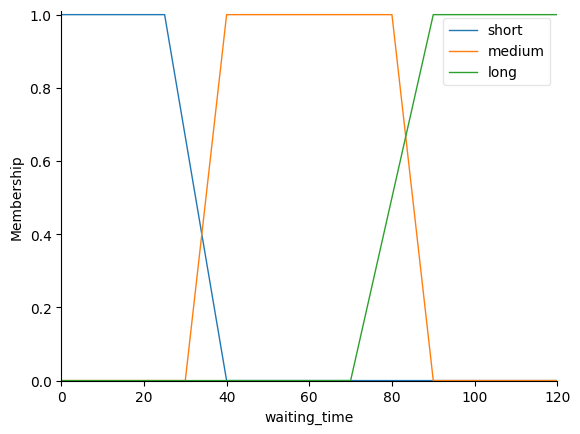

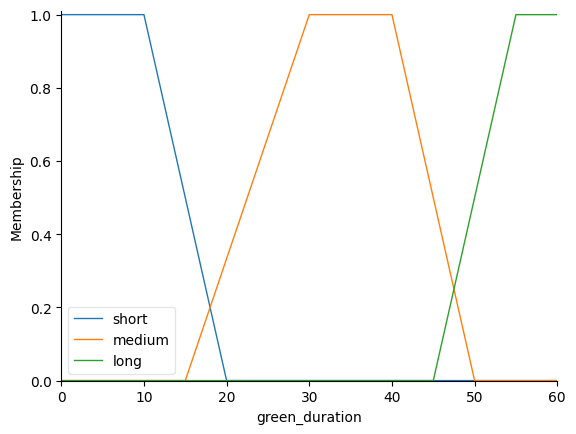

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Step 1
# Inputs ans outputs
time = ctrl.Antecedent(np.arange(0, 24, 1), 'time')  # Time of the day (0:00-23:59)
traffic = ctrl.Antecedent(np.arange(0, 51, 1), 'traffic') # Number of vehicles
waiting_time = ctrl.Antecedent(np.arange(0, 121, 1), 'waiting_time') # waiting time in seconds
green_duration = ctrl.Consequent(np.arange(0, 61, 1), 'green_duration') # Green light duration

# Step 2
# Creating Fuzzy sets for time of the day
time['low'] = fuzz.trapmf(time.universe, [0, 0, 4, 8])        # time : 0:00-8:59 zero to few cars
time['high'] = fuzz.trapmf(time.universe, [6, 10, 15, 18])    # time : 9:00-18:59 few to many cars
time['medium'] = fuzz.trapmf(time.universe, [17, 20, 23, 23]) # time : 17:00-23:59 many to few cars

# Visualize
time.view()
plt.show()
print("\n")

# Creating Fuzzy sets for traffic
traffic['low'] = fuzz.trapmf(traffic.universe, [0, 0, 5, 15])       # 5 - 15 vehicles waiting
traffic['medium'] = fuzz.trapmf(traffic.universe, [10, 20, 30, 35]) # 10 - 35 vehicles waiting
traffic['high'] = fuzz.trapmf(traffic.universe, [30, 40, 50, 50])   # 30 - 50 vehicles waiting

# Visualize
traffic.view()
plt.show()
print("\n")

# Creating Fuzzy sets for waiting time
waiting_time['short'] = fuzz.trapmf(waiting_time.universe, [0, 0, 25, 40])    # waiting 0-40 seconds
waiting_time['medium'] = fuzz.trapmf(waiting_time.universe, [30, 40, 80, 90]) # waiting 30-90 seconds
waiting_time['long'] = fuzz.trapmf(waiting_time.universe, [70, 90, 120, 120]) # waiting 70-120 seconds

# Visualize
waiting_time.view()
plt.show()
print("\n")

# Creating Fuzzy sets for the green duration of a traffic light
green_duration['short'] = fuzz.trapmf(green_duration.universe, [0, 0, 10, 20])    # Green light duration 0-20 seconds
green_duration['medium'] = fuzz.trapmf(green_duration.universe, [15, 30, 40, 50]) # Green light duration 15-50 seconds
green_duration['long'] = fuzz.trapmf(green_duration.universe, [45, 55, 60, 60])   # Green light duration 45-60 seconds

# Visualize
green_duration.view()
plt.show()
print("\n")

# Step 3
# Creating rules (all the posible combinations of time,traffic and waiting_time)
rule1 = ctrl.Rule(time['low'] & traffic['low'] , green_duration['short'])
rule2 = ctrl.Rule(time['low'] & traffic['medium'] & (waiting_time['short'] | waiting_time['medium']), green_duration['short'])
rule3 = ctrl.Rule(time['low'] & traffic['medium'] & waiting_time['long'], green_duration['medium'])
rule4 = ctrl.Rule(time['low'] & traffic['high'] , green_duration['long'])
rule5 = ctrl.Rule(time['medium'] & traffic['low'] & (waiting_time['short'] | waiting_time['medium']), green_duration['medium'])
rule6 = ctrl.Rule(time['medium'] & traffic['low'] & waiting_time['long'], green_duration['long'])
rule7 = ctrl.Rule(time['medium'] & traffic['medium'] & (waiting_time['short'] | waiting_time['medium']), green_duration['medium'])
rule8 = ctrl.Rule(time['medium'] & traffic['medium'] & waiting_time['long'], green_duration['long'])
rule9 = ctrl.Rule(time['high'] & traffic['low'] & (waiting_time['short'] | waiting_time['medium']), green_duration['medium'])
rule10 = ctrl.Rule(time['high'] & traffic['low'] & waiting_time['long'], green_duration['long'])
rule11 = ctrl.Rule(time['high'] & (traffic['medium'] | traffic['high']), green_duration['long'])

# Step 4
# Control system
green_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
green_sim = ctrl.ControlSystemSimulation(green_ctrl)

In [3]:
# Step 5
# Testing
green_sim.input['time'] = 10  # Time: 10 am
green_sim.input['traffic'] = 30  # Traffic: 30 vehicles
green_sim.input['waiting_time'] = 60  # Waiting time: 60 seconds

# computing the output
green_sim.compute()

# results
print(f"The duration of the green light is: {green_sim.output['green_duration']:.2f} seconds")

The duration of the green light is: 54.58 seconds
